In [1]:
import pandas_gbq
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


project_name = "social-computing-436902"
dataset_name = "stackexchange"
colors = plt.get_cmap('plasma').colors

plt.style.use("Solarize_Light2")
quoted_table_name = lambda table_name:f"`{project_name}`.`{dataset_name}`.`{table_name}`"


In [2]:


# table top_one_percent_of_contributors was created using top_one_percent_of_contributors.sql

top_01pct_users_df = pandas_gbq.read_gbq(f"select * from {quoted_table_name('top_zero_one_percent_of_contributors')}", project_id=project_name)

/home/prithaj/.virtualenvs/stackoverflow_analysis-1iOcKwg9/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2379: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


In [3]:
top_01pct_users_df.shape

(31039, 7)

In [6]:
top_01pct_users_df["year"] = top_1pct_users_df["CreationDate"].dt.year

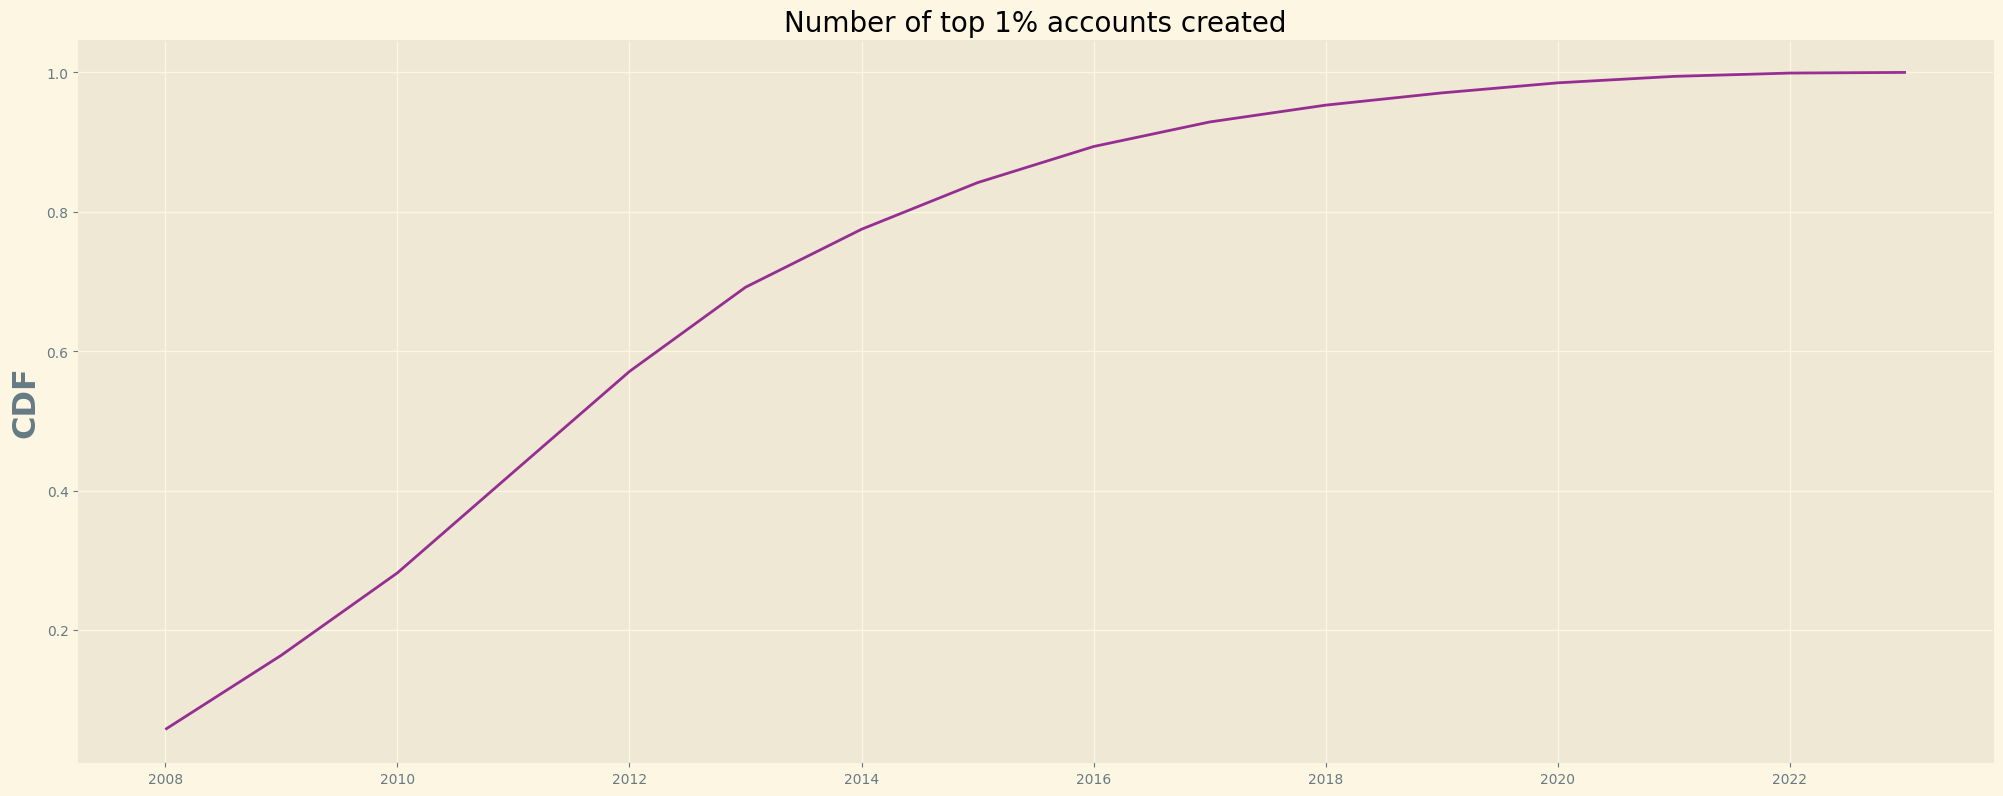

In [7]:
plt.figure(figsize=(20, 8))

# Group by year and count, then sort by year
data = top_01pct_users_df.groupby(by=["year"]).size().sort_index()

# Calculate the CDF by cumulatively summing and normalizing the data
cdf = data.cumsum() / data.sum()

# Plot the CDF
sns.lineplot(x=data.keys(), y=cdf, alpha=0.8, color="purple", linewidth=2)

# Improve the layout and labels
plt.tight_layout()
plt.xlabel("")
plt.ylabel("CDF", fontsize=23, fontdict={"fontweight":"bold"})
plt.title("Number of top 1% accounts created", fontdict={"size": 20})

plt.show()

In [6]:
cdf

year
2008    0.038085
2009    0.116108
2010    0.210770
2011    0.341600
2012    0.484469
2013    0.615063
2014    0.711246
2015    0.790711
2016    0.855739
2017    0.903288
2018    0.936471
2019    0.961297
2020    0.980929
2021    0.992217
2022    0.998225
2023    0.999871
2024    1.000000
dtype: float64

In [4]:
with open("bigquery_sql/questions_answered_distribution.sql", "r") as f:
    questions_answered_sql = f.read()

questions_answered_df = pandas_gbq.read_gbq(questions_answered_sql, project_id=project_name)

/home/prithaj/.virtualenvs/stackoverflow_analysis-1iOcKwg9/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2379: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


In [4]:
superser_num_of_questions_answered_2014_sql = f"""
select
  user_id,
  avg(num_questions_answered) over (partition by user_id, year order by month rows between 6 preceding and current row) as six_month_avg,
  year,
  month
from
  `social-computing-436902.stackexchange.superusers_num_of_questions_answered_count`
where user_id in (
  select OwnerUserId from
   `social-computing-436902.stackexchange.top_zero_one_percent_of_contributors` where CreationDate < '2014-12-31'
) order by year;

"""
superser_num_of_questions_answered_2014_df = pandas_gbq.read_gbq(superser_num_of_questions_answered_2014_sql, project_id=project_name)

In [5]:
superser_num_of_questions_answered_2014_df.set_index("user_id", inplace=True)

In [6]:
top_10_users = top_01pct_users_df.sort_values(by=["Reputation"], ascending=False).head(10)

In [7]:
top_10_users

,OwnerUserId,DisplayName,CreationDate,Reputation,AboutMe,QuestionsAnswered,Pctile
608,22656,Jon Skeet,2008-09-26 12:05:05.150,1457162,"<p>Author of <a href=""https://www.manning.com/...",35697,1
527,6309,VonC,2008-09-13 22:22:33.173,1347333,"<ul>\n<li><p><img src=""https://i.stack.imgur.c...",31232,1
650,1144035,Gordon Linoff,2012-01-11 19:53:57.590,1255823,"<p>Check out my book <strong><em><a href=""http...",85089,1
2919,157882,BalusC,2009-08-17 16:42:02.403,1095994,"<p>A <a href=""https://www.linkedin.com/in/balu...",17133,1
579,100297,Martijn Pieters,2009-05-03 14:53:57.543,1084217,\n<p>Invisible framework coding ninja</p>\n<p>...,19919,1
829,157247,T.J. Crowder,2009-08-16 11:00:22.497,1054815,"<p>Glad to see <a href=""https://meta.stackexch...",22709,1
2714,23354,Marc Gravell,2008-09-29 05:46:02.697,1043814,<p>e-mail: marc.gravell@gmail.com<br/>\nblog: ...,16806,1
2608,29407,Darin Dimitrov,2008-10-19 16:07:47.823,1031352,<p>I love writing code and I am really passion...,21424,1
1750,115145,CommonsWare,2009-05-31 16:20:08.610,995922,"<p>Mark Murphy, founder of CommonsWare, writes...",22999,1
2288,893,Greg Hewgill,2008-08-10 08:27:00.463,970924,"<p>Software geek.</p>\n<p>Mastodon: <a href=""h...",5389,1


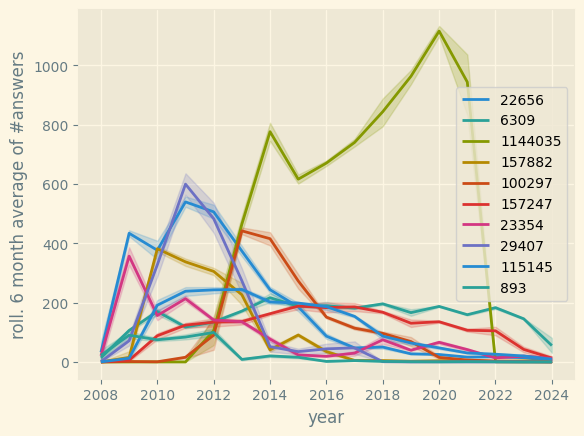

In [ ]:
from scipy.stats import linregress

for user_id in list(top_10_users["OwnerUserId"]):
# for user_id in [43615, 25891, 41214]:
    d =superser_num_of_questions_answered_2014_df.loc[user_id].copy()
    sns.lineplot(data=d, x="year", y="six_month_avg", label=f"{user_id}")
    
plt.ylabel("roll. 6 month average of #answers")
plt.show()

In [24]:
superser_num_of_questions_answered_2014_df

,six_month_avg,year,month
user_id,,,
810,0.0,2008,1
810,0.0,2008,2
810,0.0,2008,3
810,0.0,2008,4
810,0.0,2008,5
...,...,...,...
4283581,0.0,2024,8
4283581,0.0,2024,9
4283581,0.0,2024,10


In [8]:
from scipy.optimize import curve_fit
from datetime import timedelta
from dateutil.relativedelta import relativedelta

activity_threshold_ratio = 0.01
# Assuming your DataFrame is named superser_num_of_questions_answered_2008_df
df = superser_num_of_questions_answered_2014_df.reset_index()

# Step 1: Identify the peak period for each user
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))  # Create a date column for sorting
peak_df = df.loc[df.groupby('user_id')['six_month_avg'].idxmax()]  # Find the peak for each user

# Step 2: Filter data post-peak for each user
df = df.merge(peak_df[['user_id', 'date']], on='user_id', suffixes=('', '_peak'))
df_post_peak = df[df['date'] >= df['date_peak']]  # Only data after the peak

# Function to calculate months since peak
def months_since_peak(d1, d2):
    return (d1.year - d2.year) * 12 + (d1.month - d2.month)

# Define the exponential decay function
def exponential_decay(t, a, k):
    return a * np.exp(-k * t)

# Step 3: Fit exponential decay for each user
churn_rates = []

for user_id, user_data in df_post_peak.groupby('user_id'):
    user_data = user_data.sort_values('date')
    peak_dt = user_data["date"].iloc[0]
    
    # Calculate months since peak
    user_data['months_since_peak'] = user_data['date'].apply(lambda x: months_since_peak(x, user_data['date'].iloc[0]))
    
    # Prepare data for fitting
    t = user_data['months_since_peak'].values
    y = user_data['six_month_avg'].values
    
    # Initial guesses for a and k
    initial_guess = [y[0], 0.1]  # Starting with the peak value and an arbitrary decay rate
    
    # Fit the exponential decay model
    try:
        popt, _ = curve_fit(exponential_decay, t, y, p0=initial_guess, maxfev=10000)
        a, k = popt
        y = activity_threshold_ratio * a
        if k <= 0.1 or a <= 0 or y <= 0:
            time_to_churn = np.inf  # No meaningful churn time
        else:
            time_to_churn = -np.log(y / a) / k
            churn_date = peak_dt + relativedelta(months=round(time_to_churn))
        churn_rates.append({'user_id': user_id, 'decay_rate': k, "date_of_churn": churn_date if time_to_churn != np.inf else np.nan})
    except RuntimeError:
        # If the fit fails, we can append NaN or some default value
        churn_rates.append({'user_id': user_id, 'decay_rate': np.nan})

# Convert results to DataFrame
churn_rates_df = pd.DataFrame(churn_rates)

# Sort users by decay rate to see who churned faster
churn_rates_df = churn_rates_df.sort_values(by='decay_rate', ascending=False)
churn_rates_df



/tmp/ipykernel_53773/1152455987.py:44: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(exponential_decay, t, y, p0=initial_guess, maxfev=10000)
/tmp/ipykernel_53773/1152455987.py:44: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(exponential_decay, t, y, p0=initial_guess, maxfev=10000)
/tmp/ipykernel_53773/1152455987.py:44: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(exponential_decay, t, y, p0=initial_guess, maxfev=10000)
/tmp/ipykernel_53773/1152455987.py:44: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(exponential_decay, t, y, p0=initial_guess, maxfev=10000)
/tmp/ipykernel_53773/1152455987.py:44: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(exponential_decay, t, y, p0=initial_guess, maxfev=10000)
/tmp/ipykernel_53773/1152455987.py:44: OptimizeWarning: Covarianc

,user_id,decay_rate,date_of_churn
17407,1584772,734.414712,2012-12-01
8118,403582,734.411964,2019-12-01
2063,43635,734.409889,2009-12-01
692,8709,734.407040,2008-12-01
21592,2744166,734.405547,2015-12-01
...,...,...,...
18059,1725871,-0.004088,NaT
6665,288568,-0.004901,NaT
22473,3121975,-0.006758,NaT
13025,916937,-0.007165,NaT


In [50]:
time_to_churn, k

(np.float64(5637.157427308752), np.float64(0.0004084656358609676))

In [9]:
churn_rates_df = churn_rates_df.set_index("user_id")

In [10]:
churn_rates_df[(churn_rates_df["decay_rate"] >700)]

,decay_rate,date_of_churn
user_id,,
1584772,734.414712,2012-12-01
403582,734.411964,2019-12-01
43635,734.409889,2009-12-01
8709,734.407040,2008-12-01
2744166,734.405547,2015-12-01
2354107,734.392129,2013-12-01
2613662,734.387507,2015-12-01
402240,734.078577,2011-12-01
1563528,734.068619,2016-12-01


In [11]:
churn_rates_df["decay_rate"].describe()

count    24889.000000
mean         0.900110
std         20.830572
min         -0.009617
25%          0.055442
50%          0.124448
75%          0.221013
max        734.414712
Name: decay_rate, dtype: float64

In [54]:
np.percentile(churn_rates_df["decay_rate"], 75)

np.float64(0.22101323058300748)

In [12]:
churn_rates_df.loc[1144035]

decay_rate       0.081408
date_of_churn         NaT
Name: 1144035, dtype: object

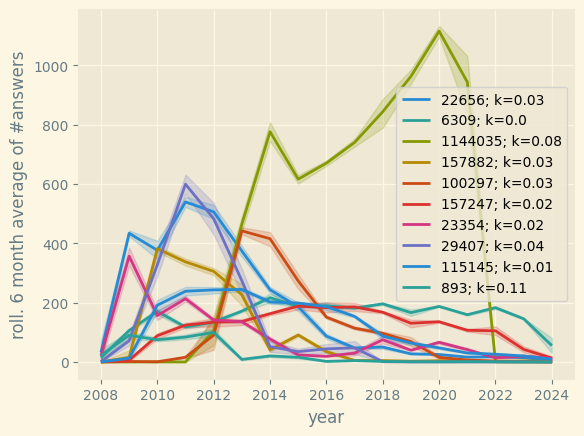

In [78]:
for user_id in list(top_10_users["OwnerUserId"]):
# for user_id in [43615, 25891, 41214]:
    d =superser_num_of_questions_answered_2014_df.loc[user_id].copy()
    k = churn_rates_df.loc[user_id]["decay_rate"]
    t = churn_rates_df.loc[user_id]["date_of_churn"]
    sns.lineplot(data=d, x="year", y="six_month_avg", label=f"{user_id}; k={round(k,2)}")
    # plt.axvline(x=churn_date, color="red", linestyle="--")
plt.ylabel("roll. 6 month average of #answers")
plt.show()

In [69]:
churn_rates_df["decay_rate"].median()

np.float64(0.12444774529646453)

In [13]:
churned_superusers = churn_rates_df[churn_rates_df["decay_rate"] >= churn_rates_df["decay_rate"].median()].reset_index()
churned_superusers["decay_rate"] = churned_superusers["decay_rate"].apply(lambda k:round(k,2))

In [70]:
churned_superusers.to_csv("churned_superusers.csv", index=False)

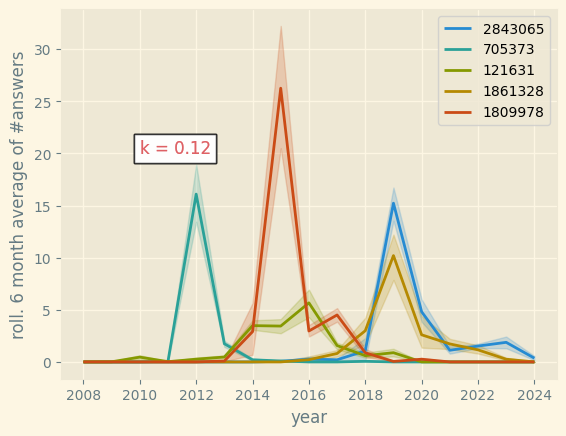

In [120]:
K = [0.12]

for user_id in list(churned_superusers[churned_superusers["decay_rate"].isin(K)].iloc[:5]["user_id"]):
# for user_id in [43615, 25891, 41214]:
    d =superser_num_of_questions_answered_2014_df.loc[user_id].copy()
    k = churn_rates_df.loc[user_id]["decay_rate"]
    t = churn_rates_df.loc[user_id]["date_of_churn"]
    sns.lineplot(data=d, x="year", y="six_month_avg", label=f"{user_id}")
    plt.text(2010, 20, f"k = {', '.join([str(i) for i in K])}", fontsize=12, color=colors[150], bbox=dict(facecolor="white", alpha=0.5))
    # sns.lineplot(data=d, x="year", y="six_month_avg")
    # plt.axvline(x=churn_date, color="red", linestyle="--")
plt.ylabel(f"roll. 6 month average of #answers")
plt.show()

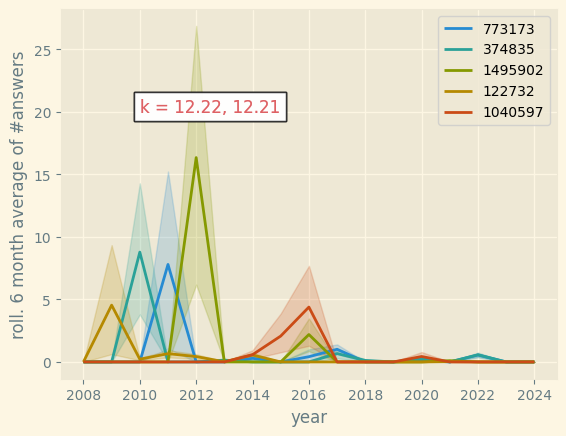

In [119]:
K = [12.22,12.21]

for user_id in list(churned_superusers[churned_superusers["decay_rate"].isin(K)].iloc[:5]["user_id"]):
# for user_id in [43615, 25891, 41214]:
    d =superser_num_of_questions_answered_2014_df.loc[user_id].copy()
    k = churn_rates_df.loc[user_id]["decay_rate"]
    t = churn_rates_df.loc[user_id]["date_of_churn"]
    sns.lineplot(data=d, x="year", y="six_month_avg", label=f"{user_id}")
    plt.text(2010, 20, f"k = {', '.join([str(i) for i in K])}", fontsize=12, color=colors[150], bbox=dict(facecolor="white", alpha=0.5))
    # sns.lineplot(data=d, x="year", y="six_month_avg")
    # plt.axvline(x=churn_date, color="red", linestyle="--")
plt.ylabel(f"roll. 6 month average of #answers")
plt.show()

In [14]:
nonchurned_superusers = churn_rates_df[churn_rates_df["decay_rate"] < 0]
nonchurned_superusers

,decay_rate,date_of_churn
user_id,,
1387438,-0.000031,NaT
80002,-0.000300,NaT
1056632,-0.000393,NaT
43615,-0.000584,NaT
2876079,-0.000737,NaT
20860,-0.000866,NaT
64904,-0.000990,NaT
225186,-0.001026,NaT
1650337,-0.001037,NaT


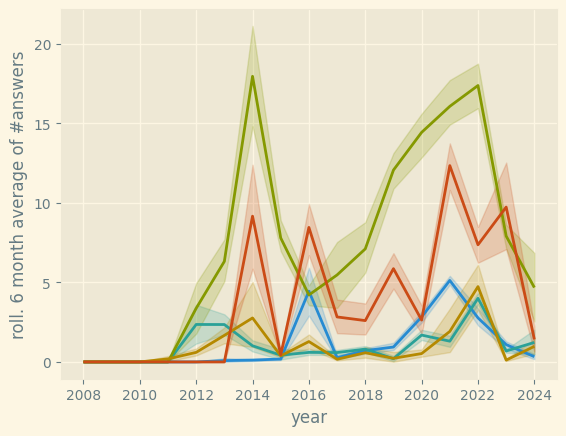

In [131]:
for user_id in nonchurned_superusers.reset_index().sample(5, random_state=42)["user_id"]:
# for user_id in [43615, 25891, 41214]:
    d =superser_num_of_questions_answered_2014_df.loc[user_id].copy()
    k = churn_rates_df.loc[user_id]["decay_rate"]
    t = churn_rates_df.loc[user_id]["date_of_churn"]
    sns.lineplot(data=d, x="year", y="six_month_avg")
    # sns.lineplot(data=d, x="year", y="six_month_avg")
    # plt.axvline(x=churn_date, color="red", linestyle="--")
plt.ylabel(f"roll. 6 month average of #answers")
plt.show()

In [26]:
churned_superusers_list = ",".join([str(i) for i in churned_superusers["user_id"].values])

churned_user_tags_sql = f"""
select  
tag,
count(distinct user_id) as num_users
from `social-computing-436902.stackexchange.supersuser_tags`
where user_id in ({churned_superusers_list})
group by 1;

"""
print(churned_user_tags_sql)


select  
tag,
count(distinct user_id) as num_users
from `social-computing-436902.stackexchange.supersuser_tags`
where user_id in (1584772,403582,43635,8709,2744166,2354107,2613662,402240,1563528,2773206,3334049,1356238,4108552,2609966,2840864,3949564,4135133,376743,1689607,2612112,2072693,1081909,1177814,4210332,9371,318223,1453216,1173114,2075801,3514,3064741,2194537,2398886,455302,123862,3136246,2706605,1079716,1168372,2920151,1644189,364001,140816,2456565,1828382,1646106,2200659,1366302,1737627,2073001,1578500,410677,2527433,1626719,2074346,211840,633970,576313,572761,899271,617584,880096,1436931,1887566,1187459,3860531,3765319,1445740,131368,459176,1158215,645186,1246391,513818,1462295,376382,3030058,2718747,3176419,2511404,78246,16782,509529,3048429,94475,2686480,3879497,3456956,661853,1425813,500105,913021,1460496,3840929,499417,1495994,1818055,791265,2210750,623400,2460200,2832398,326834,97869,773173,374835,1495902,122732,1040597,474193,1936390,760641,68524,995429,1385075,25910

In [27]:
churned_superuser_tags_df = pd.read_gbq(churned_user_tags_sql, project_id=project_name)

/tmp/ipykernel_53773/863812389.py:1: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  churned_superuser_tags_df = pd.read_gbq(churned_user_tags_sql, project_id=project_name)


In [41]:
top_n_tags_for_churned_superusers = churned_superuser_tags_df.sort_values(by=["num_users"], ascending=False).head(10).iloc[1:]

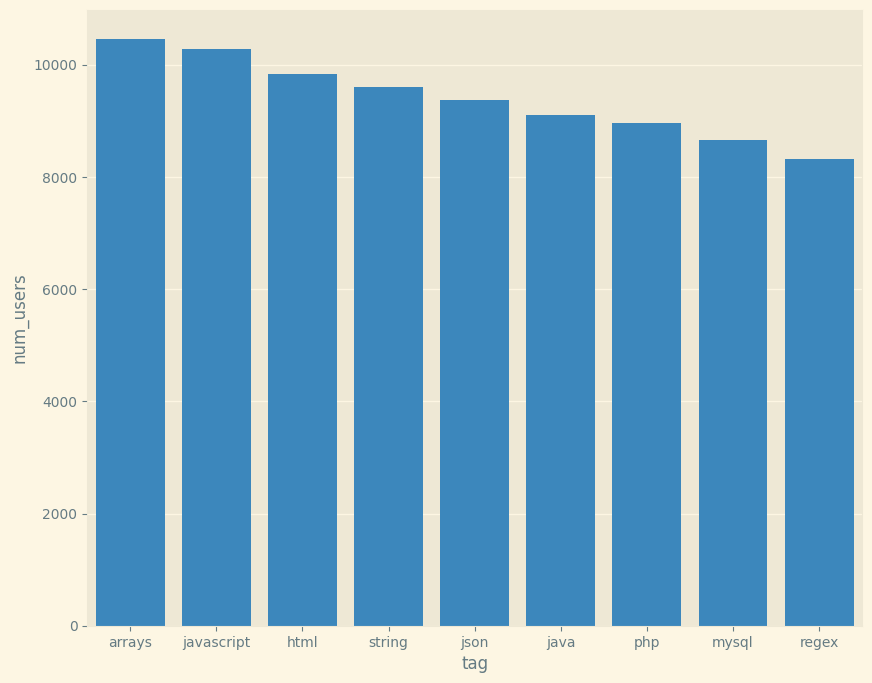

In [43]:
plt.figure(figsize=(10,8 ))
sns.barplot(data=top_n_tags_for_churned_superusers, x="tag", y="num_users")
plt.show()

In [45]:
nonchurned_superusers_list = ",".join([str(i) for i in nonchurned_superusers.reset_index()["user_id"].values])

nonchurned_user_tags_sql = f"""
select  
tag,
count(distinct user_id) as num_users
from `social-computing-436902.stackexchange.supersuser_tags`
where user_id in ({nonchurned_superusers_list})
group by 1;

"""
print(nonchurned_user_tags_sql)


select  
tag,
count(distinct user_id) as num_users
from `social-computing-436902.stackexchange.supersuser_tags`
where user_id in (1387438,80002,1056632,43615,2876079,20860,64904,225186,1650337,13070,2529954,3280538,934719,3716552,914716,2145769,1529843,624368,269970,2288659,1398228,1725871,288568,3121975,916937,3228495)
group by 1;




In [46]:

nonchurned_superuser_tags_df = pd.read_gbq(nonchurned_user_tags_sql, project_id=project_name)

/tmp/ipykernel_53773/2759046932.py:1: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  nonchurned_superuser_tags_df = pd.read_gbq(nonchurned_user_tags_sql, project_id=project_name)


In [49]:
nonchurned_superuser_tags_df.sort_values(by=["num_users"], ascending=False)

,tag,num_users
1619,,26
1632,python,23
219,json,21
44,linux,20
1634,javascript,20
...,...,...
2934,solrconfig,1
2933,dokuwiki,1
2932,create-view,1
2931,crosstab,1


In [52]:

top_n_tags_for_nonchurned_superusers = nonchurned_superuser_tags_df.sort_values(by=["num_users"], ascending=False).head(20).iloc[1:]

In [53]:
top_n_tags_for_nonchurned_superusers

,tag,num_users
1632,python,23
219,json,21
44,linux,20
1634,javascript,20
1628,java,20
1630,arrays,20
380,bash,19
1622,c#,18
252,string,18
85,api,18


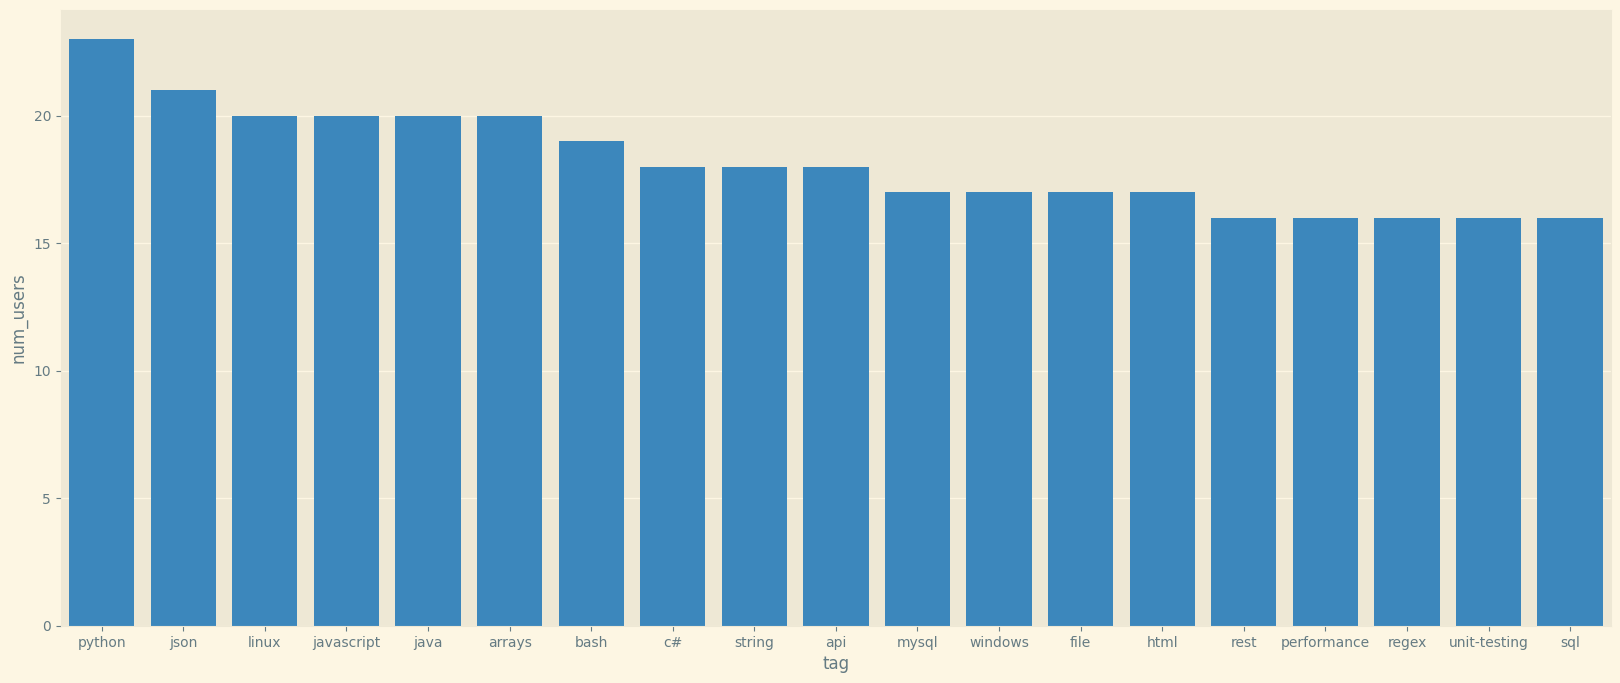

In [55]:
plt.figure(figsize=(20,8 ))
sns.barplot(data=top_n_tags_for_nonchurned_superusers, x="tag", y="num_users")
plt.show()

In [132]:
superser_num_of_questions_answered_2014_df[superser_num_of_questions_answered_2014_df["six_month_avg"] > 200]

,six_month_avg,year,month,date
user_id,,,,
13302,206.000000,2009,11,2009-11-01
13302,215.857143,2009,12,2009-12-01
23354,369.000000,2009,1,2009-01-01
23354,409.000000,2009,2,2009-02-01
23354,403.666667,2009,3,2009-03-01
...,...,...,...,...
2501279,208.000000,2023,1,2023-01-01
3732271,308.000000,2023,1,2023-01-01
3732271,294.000000,2023,2,2023-02-01


In [138]:
superser_num_of_questions_answered_2014_df.groupby(by=["user_id"])["six_month_avg"].mean()

user_id
4           0.705205
5           1.045565
13          9.974323
17          2.643732
22          0.932049
              ...   
7484766     1.349545
7867822     3.071254
9827379     1.668627
20623798    1.245635
21101651    1.419876
Name: six_month_avg, Length: 24889, dtype: float64

In [122]:
superser_total_num_of_questions_answered_by_year_df = pd.read_gbq(f"select year, sum(num_questions_answered) as num_questions_answered from {quoted_table_name('superusers_num_of_questions_answered_count')} group by 1")

/tmp/ipykernel_37251/2573914926.py:1: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  superser_total_num_of_questions_answered_by_year_df = pd.read_gbq(f"select year, sum(num_questions_answered) as num_questions_answered from {quoted_table_name('superusers_num_of_questions_answered_count')} group by 1")


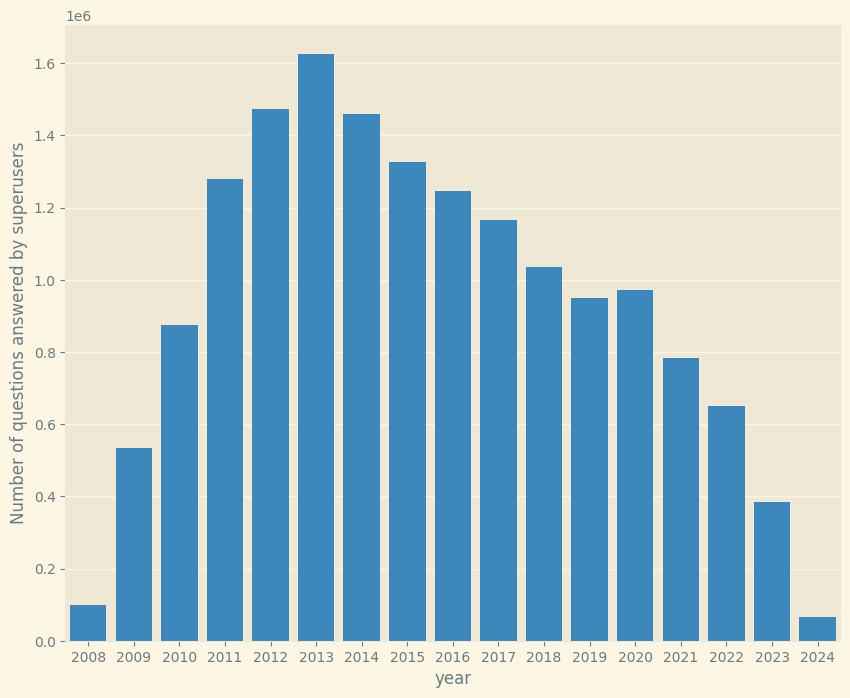

In [123]:
plt.figure(figsize=(10,8))
sns.barplot(data=superser_total_num_of_questions_answered_by_year_df, x="year", y="num_questions_answered")

plt.ylabel(f"Number of questions answered by superusers")
plt.show()

In [60]:
num_questions_by_year_sql = """
select
extract(year from creationDate) as year,
count(Id) as num_questions
from
`social-computing-436902.stackexchange.stackoverflow_posts`
where PostTypeId = 1
group by 1
;

"""

num_questions_by_year_df = pd.read_gbq(num_questions_by_year_sql, project_id=project_name)

/tmp/ipykernel_53773/3442747903.py:13: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  num_questions_by_year_df = pd.read_gbq(num_questions_by_year_sql, project_id=project_name)


In [64]:
num_questions_by_year_df.sort_values(by=["year"], inplace=True)

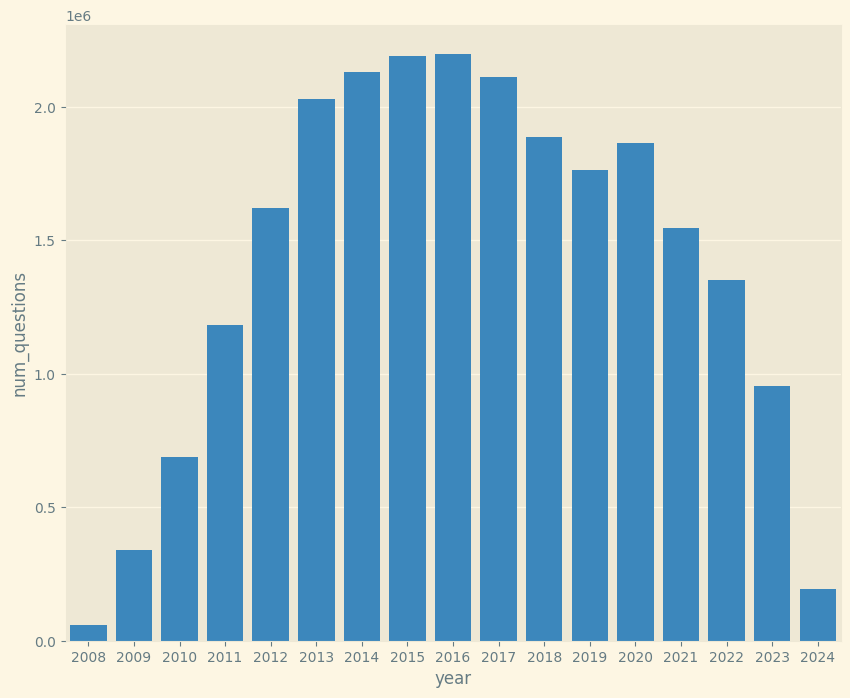

In [66]:
plt.figure(figsize=(10, 8))
sns.barplot(data=num_questions_by_year_df.sort_values(by=["year"]), x="year", y="num_questions")
# plt.bar(x=num_questions_by_year_df["year"], height=num_questions_by_year_df["num_questions"])
plt.show()

* Super users make up only 0.13% of total users but contribute ~30% of answers
* 80% these accounts were created in the first six years of the site's launch date
* Majority of questions (>90%) answered by the top 1% were answered in the first six years


TODO:

* Find out  
